## Perceptron Learning Algorithm
Notes and experiments from http://machinelearningcoban.com/2017/01/21/perceptron/

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N1, N2 = 10, 10
N = N1 + N2
X0 = np.random.multivariate_normal(means[0], cov, N1)
X1 = np.random.multivariate_normal(means[1], cov, N2)

X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.ones((N1, 1)), -1*np.ones((N2, 1))), axis=0)

# Format data: prepend column ones
X = np.concatenate((np.ones((N, 1)), X), axis=1)

In [2]:
def h(X, w):
    return np.sign(X.dot(w.T))

def has_converged(X, y, w):
    return np.array_equal(h(X, w), y)

def perceptron(X, y, w_init, max_count=1000):
    N = X.shape[0]
    w_history = [w_init]
    
    count = 0
    while count < max_count:
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i, :]
            yi = y[i, :]
            
            if h(xi, w_history[-1]) != yi:
                w_updated = w_history[-1] + yi*xi
                w_history.append(w_updated)
        if has_converged(X, y, w_history[-1]):
            return w_history, count
        count += 1
        
    return w_history, count

In [3]:
def display_data(X, y, w=None):
    X0 = X[np.where(y == 1)[0], :]
    X1 = X[np.where(y == -1)[0], :]
    
    plt.scatter(X0[:, 1], X0[:, 2], color='blue', marker='^')
    plt.scatter(X1[:, 1], X1[:, 2], color='red', marker='o')
    
    # Plot dicision boundary
    if w is not None:
        w = w.reshape(1, -1)
        a_x2, b_x2 = X[:, 2].min(), X[:, 2].max()
        a_x1 = -(w[0, 0] + w[0, 2]*a_x2)/w[0, 1]
        b_x1 = -(w[0, 0] + w[0, 2]*b_x2)/w[0, 1]
        plt.plot([a_x1, b_x1], [a_x2, b_x2], color='red')
    
    plt.show()

Iterations: 1
w: [[ 2.88952006 -3.0235495   2.85497544]]


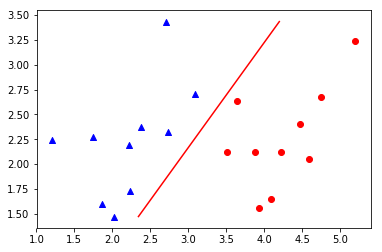

In [4]:
w_history, count = perceptron(X, y, w_init=np.random.rand(1, X.shape[1]))
print('Iterations:', count)
print('w:', w_history[-1])
display_data(X, y, w_history[-1])

It is mathematically proved that if data is _linearly separable_, then after a number of steps to update $w$ as in PLA (ie. $w = w + y_i*x_i$), the _convergence_ eventually occurs. In other words, the given algorithm always comes up with a solution in case data is linearly separable
See the proof at http://machinelearningcoban.com/2017/01/21/perceptron/


Now, let's try to use PLA to model the function __XOR__ in which the outcomes are not separated by a hyperplane.

Iterations: 5000


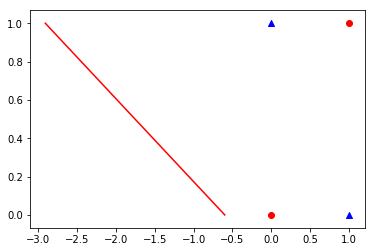

In [5]:
# Try with non-linearly separable
X = [[b1, b2] for b1 in [0, 1] for b2 in [0, 1]]
y = np.array([2*(b1^b2)-1 for [b1, b2] in X]).reshape(-1, 1) # function f(x) = 2x - 1 maps the inputs {0, 1} --> {-1, 1}
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)

w_history, count = perceptron(X, y, w_init=np.random.rand(1, X.shape[1]), max_count=5000)
print('Iterations:', count)
display_data(X, y, w_history[-1])

___Observation:___
The number of iterations reaches max_count which was set as 5000, demonstrating that the _convergence_ did _NOT_ take place.